시작

In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os
print(os.listdir("./input"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [2]:
#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
# datetime을 년,월,일,시 값으로 나누어서 확인
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['dayofweek'] = train.datetime.dt.dayofweek

test['year'] = test.datetime.dt.year
test['month'] =test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['dayofweek'] = test.datetime.dt.dayofweek

In [4]:
# 필요 없는 특성 제거
train.columns, test.columns
del_train=['datetime','casual','registered']
train.drop(del_train, axis=1,inplace=True)
test.drop('datetime', axis=1,inplace=True)

추가로 필요 없는 특성을 찾기 위해 이것저것 지워보자

In [5]:
train.drop('windspeed', axis=1,inplace=True)
test.drop('windspeed', axis=1,inplace=True)

최종 tarin, test 값

In [6]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5


In [7]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,2011,1,20,0,3
1,1,0,1,1,10.66,13.635,56,2011,1,20,1,3
2,1,0,1,1,10.66,13.635,56,2011,1,20,2,3
3,1,0,1,1,10.66,12.880,56,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,2011,1,20,4,3


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   count       10886 non-null  int64  
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  dayofweek   10886 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.1 MB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   year        6493 non-null   int64  
 8   month       6493 non-null   int64  
 9   day         6493 non-null   int64  
 10  hour        6493 non-null   int64  
 11  dayofweek   6493 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 608.8 KB


모델 평가

In [8]:
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [9]:
from sklearn.model_selection import train_test_split
target = train['count']
features = train.drop(columns=['count'])
target = np.log1p(target)
train_input, test_input, train_target, test_target = train_test_split(
    features,target, random_state=42
)

선형회귀

In [13]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()

lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
# 성능평가
pred = lr.predict(test_input)
# 다시 지수로
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
print('RMSLE Value for LinearRegression {}'.format(rmsle(test_target_exp,pred_exp,False)))

0.4897471682664274
0.4790748778123245
RMSLE Value for LinearRegression 1.02084396045903


사이킷런의 변환기

In [17]:
# 사이킷런 변환기 적용
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(8164, 91)


In [18]:
target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

# 다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# 성능평가
pred = lr.predict(test_poly)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))

(8164, 91)
0.6408120114871179
0.629729849784415
RMSLE Value 0.8606588992698018


스케일 적용

In [52]:
# 스케일 적용
from sklearn.preprocessing import StandardScaler

target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

# 성능평가
pred = lr.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
# evaluate_regr(test_target_exp,pred_exp)
print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))

0.6408085753227678
0.6297366916222058
RMSLE Value 0.8606509476218218


릿지 회귀 와 그리드 서치

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# 스케일 적용
from sklearn.preprocessing import StandardScaler

target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#릿지 회귀
ridge = Ridge()
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)


grid_ridge.fit(train_scaled, train_target)
print(grid_ridge.score(train_scaled, train_target))
print(grid_ridge.score(test_scaled,test_target))

# 성능평가
pred = grid_ridge.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
# evaluate_regr(test_target_exp,pred_exp)
print(grid_ridge.best_params_)
print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))

make_scorer(rmsle, greater_is_better=False)
-inf
-inf
{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value inf


릿지 모델의 알파 값 찾기

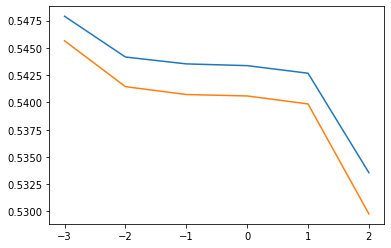

In [34]:
# 릿지 모델의 알파 값 찾기
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append((ridge.score(train_scaled, train_target)))
    test_score.append((ridge.score(test_scaled,test_target)))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

라쏘 회귀

In [61]:
target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

from sklearn.linear_model import Lasso
lasso =Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# lasso = Lasso()

# lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
# grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
# grid_lasso.fit(train_scaled,train_target)
# 성능평가
preds = lasso.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)


print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(test_target),np.exp(pred),False)))

# # 성능평가
# pred = grid_ridge.predict(test_scaled)

# # 다시 지수로 바꾸기
# test_target_exp = np.expm1(test_target)
# pred_exp = np.expm1(pred)
# # evaluate_regr(test_target_exp,pred_exp)
# print(grid_ridge.best_params_)
# print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))


0.5257637131501942
0.5205782586226129
RMSLE Value for Lasso Regression inf


In [29]:
from sklearn.linear_model import Lasso
lasso =Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.5257637131501942
0.5205782586226129


라쏘 회귀 알파값 찾기

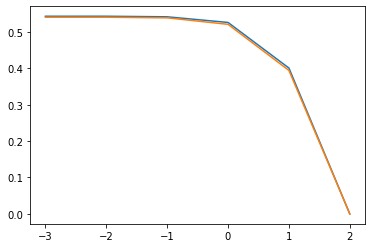

In [31]:
# 라쏘 모델의 알파 값 찾기
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append((lasso.score(train_scaled, train_target)))
    test_score.append((lasso.score(test_scaled,test_target)))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

로지스틱 회귀

In [38]:
target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)
# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

ValueError: Unknown label type: 'continuous'

SGDClassifier

In [48]:
target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)
# # 사이킷런 변환기 적용
# poly = PolynomialFeatures()
# poly.fit(train_input)
# train_poly = poly.transform(train_input)
# test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#SGDClassifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


ValueError: Unknown label type: (array([0.69314718, 1.09861229, 1.38629436, 1.60943791, 1.79175947,
       1.94591015, 2.07944154, 2.19722458, 2.30258509, 2.39789527,
       2.48490665, 2.56494936, 2.63905733, 2.7080502 , 2.77258872,
       2.83321334, 2.89037176, 2.94443898, 2.99573227, 3.04452244,
       3.09104245, 3.13549422, 3.17805383, 3.21887582, 3.25809654,
       3.29583687, 3.33220451, 3.36729583, 3.40119738, 3.4339872 ,
       3.4657359 , 3.49650756, 3.52636052, 3.55534806, 3.58351894,
       3.61091791, 3.63758616, 3.66356165, 3.68887945, 3.71357207,
       3.73766962, 3.76120012, 3.78418963, 3.80666249, 3.8286414 ,
       3.8501476 , 3.87120101, 3.8918203 , 3.91202301, 3.93182563,
       3.95124372, 3.97029191, 3.98898405, 4.00733319, 4.02535169,
       4.04305127, 4.06044301, 4.07753744, 4.09434456, 4.11087386,
       4.12713439, 4.14313473, 4.15888308, 4.17438727, 4.18965474,
       4.20469262, 4.21950771, 4.2341065 , 4.24849524, 4.26267988,
       4.27666612, 4.29045944, 4.30406509, 4.31748811, 4.33073334,
       4.34380542, 4.35670883, 4.36944785, 4.38202663, 4.39444915,
       4.40671925, 4.41884061, 4.4308168 , 4.44265126, 4.4543473 ,
       4.46590812, 4.47733681, 4.48863637, 4.49980967, 4.51085951,
       4.52178858, 4.53259949, 4.54329478, 4.55387689, 4.56434819,
       4.57471098, 4.58496748, 4.59511985, 4.60517019, 4.61512052,
       4.62497281, 4.63472899, 4.6443909 , 4.65396035, 4.66343909,
       4.67282883, 4.68213123, 4.69134788, 4.70048037, 4.7095302 ,
       4.71849887, 4.72738782, 4.73619845, 4.74493213, 4.75359019,
       4.76217393, 4.77068462, 4.77912349, 4.78749174, 4.79579055,
       4.80402104, 4.81218436, 4.82028157, 4.82831374, 4.83628191,
       4.84418709, 4.85203026, 4.8598124 , 4.86753445, 4.87519732,
       4.88280192, 4.89034913, 4.8978398 , 4.90527478, 4.91265489,
       4.91998093, 4.92725369, 4.93447393, 4.94164242, 4.94875989,
       4.95582706, 4.96284463, 4.9698133 , 4.97673374, 4.98360662,
       4.99043259, 4.99721227, 5.00394631, 5.01063529, 5.01727984,
       5.02388052, 5.03043792, 5.0369526 , 5.04342512, 5.04985601,
       5.05624581, 5.06259503, 5.0689042 , 5.07517382, 5.08140436,
       5.08759634, 5.0937502 , 5.09986643, 5.10594547, 5.11198779,
       5.11799381, 5.12396398, 5.12989871, 5.13579844, 5.14166356,
       5.14749448, 5.15329159, 5.1590553 , 5.16478597, 5.170484  ,
       5.17614973, 5.18178355, 5.18738581, 5.19295685, 5.19849703,
       5.20400669, 5.20948615, 5.21493576, 5.22035583, 5.22574667,
       5.23110862, 5.23644196, 5.24174702, 5.24702407, 5.25227343,
       5.25749537, 5.26269019, 5.26785816, 5.27299956, 5.27811466,
       5.28320373, 5.28826703, 5.29330482, 5.29831737, 5.30330491,
       5.3082677 , 5.31320598, 5.31811999, 5.32300998, 5.32787617,
       5.33271879, 5.33753808, 5.34233425, 5.34710753, 5.35185813,
       5.35658627, 5.36129217, 5.36597602, 5.37063803, 5.37527841,
       5.37989735, 5.38449506, 5.38907173, 5.39362755, 5.3981627 ,
       5.40267738, 5.40717177, 5.41164605, 5.4161004 , 5.420535  ,
       5.42495002, 5.42934563, 5.433722  , 5.43807931, 5.44241771,
       5.44673737, 5.45103845, 5.45532112, 5.45958551, 5.46383181,
       5.46806014, 5.47227067, 5.47646355, 5.48063892, 5.48479693,
       5.48893773, 5.49306144, 5.49716823, 5.50125821, 5.50533154,
       5.50938834, 5.51342875, 5.5174529 , 5.52146092, 5.52545294,
       5.52942909, 5.53338949, 5.53733427, 5.54126355, 5.54517744,
       5.54907608, 5.55295958, 5.55682806, 5.56068163, 5.56452041,
       5.5683445 , 5.57215403, 5.5759491 , 5.57972983, 5.58349631,
       5.58724866, 5.59098698, 5.59471138, 5.59842196, 5.60211882,
       5.60580207, 5.6094718 , 5.61312811, 5.6167711 , 5.62040087,
       5.62401751, 5.62762111, 5.63121178, 5.6347896 , 5.63835467,
       5.64190707, 5.6454469 , 5.64897424, 5.65248918, 5.65599181,
       5.65948222, 5.66296048, 5.66642669, 5.66988092, 5.67332327,
       5.6767538 , 5.68017261, 5.68357977, 5.68697536, 5.69035945,
       5.69373214, 5.69709349, 5.70044357, 5.70378247, 5.70711026,
       5.71042702, 5.71373281, 5.7170277 , 5.72031178, 5.7235851 ,
       5.72684775, 5.73009978, 5.73334128, 5.7365723 , 5.73979291,
       5.74300319, 5.74620319, 5.74939299, 5.75257264, 5.75574221,
       5.75890177, 5.76205138, 5.7651911 , 5.768321  , 5.77144112,
       5.77455155, 5.77765232, 5.78074352, 5.78382518, 5.78689738,
       5.78996017, 5.79301361, 5.79605775, 5.79909265, 5.80211838,
       5.80513497, 5.80814249, 5.81114099, 5.81413053, 5.81711116,
       5.82008293, 5.8230459 , 5.82600011, 5.82894562, 5.83188248,
       5.83481074, 5.83773045, 5.84064166, 5.84354442, 5.84643878,
       5.84932478, 5.85220248, 5.85507192, 5.85793315, 5.86078622,
       5.86363118, 5.86646806, 5.86929691, 5.87211779, 5.87493073,
       5.87773578, 5.88053299, 5.88332239, 5.88610403, 5.88887796,
       5.89164421, 5.89440283, 5.89715387, 5.89989735, 5.90263333,
       5.90536185, 5.90808294, 5.91079664, 5.91350301, 5.91620206,
       5.91889385, 5.92157842, 5.9242558 , 5.92692603, 5.92958914,
       5.93224519, 5.9348942 , 5.93753621, 5.94017125, 5.94279938,
       5.94542061, 5.94803499, 5.95064255, 5.95324333, 5.95583737,
       5.95842469, 5.96100534, 5.96357934, 5.96614674, 5.96870756,
       5.97126184, 5.97380961, 5.97635091, 5.97888576, 5.98141421,
       5.98393628, 5.98645201, 5.98896142, 5.99146455, 5.99396143,
       5.99645209, 5.99893656, 6.00141488, 6.00388707, 6.00635316,
       6.00881319, 6.01126717, 6.01371516, 6.01615716, 6.01859321,
       6.02102335, 6.02344759, 6.02586597, 6.02827852, 6.03068526,
       6.03308622, 6.03548143, 6.03787092, 6.04025471, 6.04263283,
       6.04500531, 6.04737218, 6.04973346, 6.05208917, 6.05443935,
       6.05678401, 6.0591232 , 6.06145692, 6.06378521, 6.06610809,
       6.06842559, 6.07073773, 6.07304453, 6.07534603, 6.07764224,
       6.0799332 , 6.08221891, 6.08449941, 6.08677473, 6.08904488,
       6.09130988, 6.09356977, 6.09582456, 6.09807428, 6.10031895,
       6.10255859, 6.10479323, 6.10702289, 6.10924758, 6.11146734,
       6.11368218, 6.11589213, 6.1180972 , 6.12029742, 6.12249281,
       6.12468339, 6.12686918, 6.12905021, 6.13122649, 6.13339804,
       6.13556489, 6.13772705, 6.13988455, 6.14203741, 6.14418563,
       6.14632926, 6.1484683 , 6.15060277, 6.15273269, 6.15485809,
       6.15697899, 6.15909539, 6.16120732, 6.1633148 , 6.16541785,
       6.16751649, 6.16961073, 6.1717006 , 6.1737861 , 6.17586727,
       6.17794411, 6.18001665, 6.18208491, 6.18414889, 6.18620862,
       6.18826412, 6.19031541, 6.19236249, 6.19440539, 6.19644413,
       6.19847872, 6.20050917, 6.20253552, 6.20455776, 6.20657593,
       6.20859003, 6.21060008, 6.2126061 , 6.2146081 , 6.2166061 ,
       6.21860012, 6.22059017, 6.22257627, 6.22455843, 6.22653667,
       6.228511  , 6.23048145, 6.23244802, 6.23441073, 6.23832463,
       6.24027585, 6.24222327, 6.2441669 , 6.24610677, 6.24804287,
       6.24997524, 6.25190388, 6.25382881, 6.25575004, 6.25766759,
       6.25958146, 6.26149168, 6.26339826, 6.26530121, 6.26720055,
       6.26909628, 6.27098843, 6.27287701, 6.27476202, 6.27664349,
       6.28039584, 6.28226675, 6.28599809, 6.28785856, 6.28971557,
       6.29156914, 6.29341928, 6.295266  , 6.29710932, 6.29894925,
       6.30078579, 6.30261898, 6.3044488 , 6.30627529, 6.30991828,
       6.31173481, 6.31354805, 6.315358  , 6.31716469, 6.31896811,
       6.32076829, 6.32256524, 6.32435896, 6.32614947, 6.32793678,
       6.32972091, 6.33150185, 6.33327963, 6.33505425, 6.33682573,
       6.33859408, 6.3403593 , 6.34212142, 6.34388043, 6.34563636,
       6.34738921, 6.34913899, 6.3526294 , 6.35610766, 6.35784227,
       6.35957387, 6.36130248, 6.3630281 , 6.36475076, 6.36647045,
       6.36818719, 6.36990098, 6.37161185, 6.37331979, 6.37502482,
       6.37672695, 6.37842618, 6.38012254, 6.38181602, 6.38350663,
       6.3851944 , 6.38687932, 6.38856141, 6.39024067, 6.39191711,
       6.39359075, 6.3952616 , 6.39859493, 6.40025745, 6.4019172 ,
       6.40522846, 6.40687999, 6.40852879, 6.41017488, 6.41181827,
       6.41345896, 6.41509696, 6.41673228, 6.41999493, 6.42162227,
       6.42324696, 6.42486902, 6.42648846, 6.42810527, 6.42971948,
       6.43133108, 6.43454652, 6.43615037, 6.43775165, 6.43935037,
       6.44094654, 6.44254017, 6.44413126, 6.44571982, 6.44730586,
       6.44888939, 6.45047042, 6.45204895, 6.453625  , 6.45519856,
       6.45676966, 6.45833828, 6.45990445, 6.46302946, 6.4645883 ,
       6.46614472, 6.46769873, 6.46925032, 6.4707995 , 6.47234629,
       6.4738907 , 6.47543272, 6.47697236, 6.48004456, 6.48157713,
       6.48310735, 6.48463524, 6.48768402, 6.48920493, 6.49072353,
       6.49223984, 6.49375384, 6.49677499, 6.49828215, 6.50128967,
       6.50428817, 6.50578406, 6.50727771, 6.50876914, 6.51025834,
       6.51174533, 6.51323011, 6.51471269, 6.51767127, 6.51914729,
       6.52062113, 6.5220928 , 6.52356231, 6.52502966, 6.52649486,
       6.52795792, 6.52941884, 6.53233429, 6.53378884, 6.53524127,
       6.5366916 , 6.53813982, 6.53958596, 6.54103   , 6.54247196,
       6.54391185, 6.54678541, 6.54965074, 6.55250789, 6.5539334 ,
       6.55535689, 6.5581978 , 6.55961524, 6.56103067, 6.56385553,
       6.56667243, 6.56807791, 6.56948142, 6.57088296, 6.57368017,
       6.57646957, 6.57925121, 6.58202514, 6.58340922, 6.58479139,
       6.58617165, 6.58755001, 6.59304453, 6.59441346, 6.59578051,
       6.5971457 , 6.59850903, 6.5998705 , 6.60394382, 6.60529792,
       6.60665019, 6.61204103, 6.61338422, 6.6147256 , 6.61606519,
       6.61873898, 6.62007321, 6.63068339, 6.63331843, 6.6424868 ,
       6.64378973, 6.64639051, 6.64768837, 6.64898455, 6.65027905,
       6.65286303, 6.65415252, 6.65544035, 6.65672652, 6.65929392,
       6.66185474, 6.6631327 , 6.66440902, 6.66568372, 6.66695679,
       6.67076632, 6.67329797, 6.67456139, 6.67582322, 6.67708346,
       6.67834211, 6.67959919, 6.6821086 , 6.68336095, 6.68586095,
       6.68710861, 6.69332367, 6.69579892, 6.69703425, 6.69826805,
       6.69950034, 6.70073111, 6.70196037, 6.70318811, 6.70686234,
       6.70930434, 6.7129562 , 6.71417053, 6.71659477, 6.71901315,
       6.72743172, 6.72862861, 6.7310181 , 6.73340189, 6.73815249,
       6.73933663, 6.74170069, 6.74405919, 6.74641213, 6.74758653,
       6.74875955, 6.75110147, 6.75343792, 6.7546041 , 6.75576892,
       6.76041469, 6.76157277, 6.76388491, 6.76619171, 6.76734313,
       6.76849321, 6.77308038, 6.78558765, 6.78784498, 6.78897174,
       6.79346613, 6.79458658, 6.80017007, 6.80350526, 6.80461452,
       6.82219739, 6.85012617, 6.87626461, 6.87832647]),)

10739

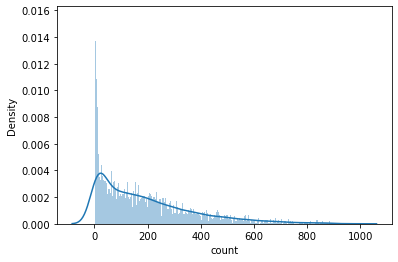

In [50]:
sns.distplot(target,bins=range(int(target.min()),int(target.max())))
target[np.logical_and(target.mean()-3*target.std() <= target,target.mean()+3*target.std() >= target)].count()

In [20]:
# 그레이디언트 부스팅

from sklearn.ensemble import GradientBoostingRegressor

target = train['count']
features = train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

gb = GradientBoostingRegressor()
gb.fit(train_scaled,train_target)
print(gb.score(train_scaled,train_target))
print(gb.score(test_scaled,test_target))

# 성능평가
pred = gb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))

0.9476551039643976
0.9430031526326007
RMSLE Value 0.33767361702188675


0.9294737840293372
0.9257839466518053
RMSLE Value for GradientBoosting 0.35968926817971497


In [64]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

target = train['count']
features = train.drop(columns=['count'])
features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# # 특성 스케일 적용
# ss=StandardScaler()
# ss.fit(train_poly)
# train_scaled = ss.transform(train_poly)
# test_scaled = ss.transform(test_poly)

rf = RandomForestRegressor()
rf.fit(train_poly,train_target)
print(rf.score(train_poly,train_target))
print(rf.score(test_poly,test_target))

# 성능평가
pred = rf.predict(test_poly)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
print('RMSLE Value {}'.format(rmsle(test_target_exp,pred_exp,False)))

0.9923929935667375
0.9484593098834108
RMSLE Value 0.3211048219311768


In [65]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   year        10886 non-null  int64  
 8   month       10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  hour        10886 non-null  int64  
 11  dayofweek   10886 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1020.7 KB


In [75]:
# 히스토그램 그래디언트
pred_rf = rf.predict(test)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_rf_exp = np.expm1(pred_rf)
# evaluate_regr(test_target_exp,pred_exp)

len(pred_rf_exp)

ValueError: X has 12 features, but DecisionTreeRegressor is expecting 1596 features as input.

<AxesSubplot:ylabel='Density'>

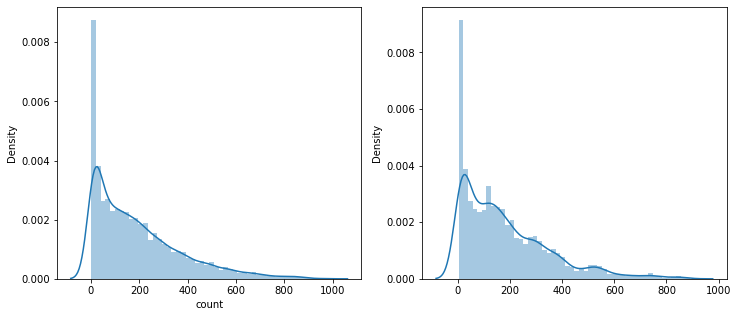

In [33]:
predsTest = rf.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(target,ax=ax1,bins=50)
sns.distplot(preds_rf_exp,ax=ax2,bins=50)

In [68]:
submit = pd.read_csv("./input/sampleSubmission.csv")
submit['count'] = pred_rf_exp
submit.to_csv("./results_rf_1.4.csv",index=False)

ValueError: Length of values (2722) does not match length of index (6493)

1.0v 다른점
windspeed == 0 을 windspeed.mean()으로 바꿈




0.44727 더 안 좋아 졌다.